# Treinamento de modelo próprio para reconhecimento de texto manuscrito



# Importando as bibliotecas

In [4]:
import tensorflow
tensorflow.__version__

'2.14.0'

In [5]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
pd.__version__

'2.1.1'

# Carregando as bases de dados

## Conjunto MNIST 0-9

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data.shape, test_data.shape

In [ ]:
28 * 28

In [ ]:
train_labels.shape, test_labels.shape

In [ ]:
train_data[0]

In [ ]:
train_data[0].shape

In [ ]:
train_labels[0]

In [ ]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [ ]:
digitos_data.shape

In [ ]:
digitos_labels.shape

In [ ]:
digitos_labels

In [ ]:
np.random.randint(0, digitos_data.shape[0])

In [ ]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

In [ ]:
sns.countplot(digitos_labels);

In [ ]:
valores = np.unique(digitos_labels, return_counts=True)[1]
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9 = np.full(valores[0],0), np.full(valores[1],1), np.full(valores[2],2), np.full(valores[3],3), np.full(valores[4],4), np.full(valores[5],5), np.full(valores[6],6), np.full(valores[7],7), np.full(valores[8],8), np.full(valores[9],9)
sns.countplot([c0, c1, c2, c3, c4, c5, c6, c7, c8, c9]);

## Conjunto Kaggle A-Z

In [ ]:
!wget https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [ ]:
zip_object = zipfile.ZipFile(file='/content/alfabeto_A-Z.zip', mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
dataset_az = pd.read_csv('/content/A_Z Handwritten Data.csv').astype('float32')

In [ ]:
dataset_az

In [ ]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [ ]:
alfabeto_data.shape, alfabeto_labels.shape

In [ ]:
alfabeto_labels

In [ ]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [ ]:
alfabeto_data.shape

In [ ]:
np.random.randint(0, alfabeto_data.shape[0])

In [ ]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]));

In [ ]:
sns.countplot(alfabeto_labels);

## Junção das bases de dados

In [ ]:
digitos_labels, np.unique(digitos_labels)

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

In [ ]:
alfabeto_labels += 10

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

In [ ]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [ ]:
data.shape, labels.shape

In [ ]:
data = np.array(data, dtype='float32')

In [ ]:
data.shape

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

# Pré-processamento dos dados

In [ ]:
data[0].min(), data[0].max()

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

In [ ]:
np.unique(labels)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)

In [ ]:
labels

In [ ]:
labels[0]

In [ ]:
labels[30000], len(labels[30000]), 26 + 10

In [ ]:
# OneHotEncoder
# A, B, C, Z
# 0, 1, 2, 25

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [ ]:
classes_total = labels.sum(axis=0)
classes_total

In [ ]:
classes_total.max()

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [ ]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_peso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Criação da estrutura da rede neural

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
2 * 2 * 128

In [ ]:
rede_neural.summary()

In [52]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [53]:
print(nomes_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Treinamento da rede neural

In [ ]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
len(X_train) // batch_size

In [ ]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

# Avaliação da rede neural

In [ ]:
X_test.shape

In [ ]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

In [ ]:
previsoes

In [ ]:
previsoes[0]

In [ ]:
len(previsoes[0])

In [ ]:
np.argmax(previsoes[0])

In [ ]:
nomes_labels[24]

In [ ]:
y_test[0]

In [ ]:
np.argmax(y_test[0])

In [ ]:
nomes_labels[np.argmax(y_test[0])]

In [ ]:
rede_neural.evaluate(X_test, y_test)

In [ ]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['val_loss']);

In [ ]:
plt.plot(history.history['val_accuracy']);

# Salvando o modelo no Google Drive

In [ ]:
rede_neural.save('rede_neural', save_format='h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!cp rede_neural /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Modelos/rede_neural

In [ ]:
!cp rede_neural /content/drive/MyDrive/Modelos

# Teste com imagens

In [7]:
from tensorflow.keras.models import load_model

In [ ]:
#rede_neural_carregada = load_model('/content/drive/MyDrive/Cursos - recursos/OCR com Python/Modelos/rede_neural')

In [12]:
# V4\ocr_training\app\src\modelo\rede_neural
# /content/drive/MyDrive/Modelos/rede_neural
rede_neural_carregada = load_model('src/modelo/rede_neural')

In [13]:
rede_neural_carregada

In [14]:
rede_neural_carregada.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

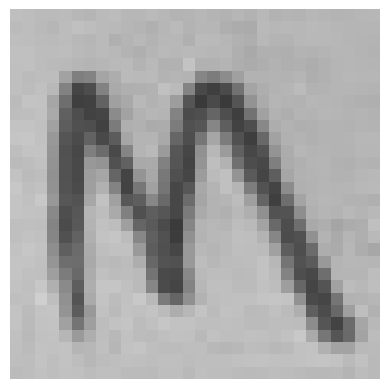

In [37]:
img = cv2.imread('src/img/letra-m.jpg')
plt.imshow(img)
plt.axis('off')  
plt.show()

In [38]:
img.shape

(30, 30, 3)

In [39]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(30, 30)

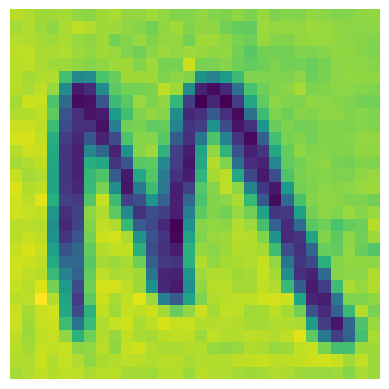

In [40]:
# cv2_imshow(gray)
plt.imshow(gray)
plt.axis('off')  
plt.show()

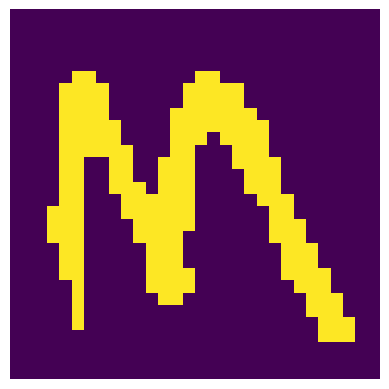

In [41]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.axis('off')  
plt.show()

In [42]:
val

137.0

In [43]:
thresh.shape

(30, 30)

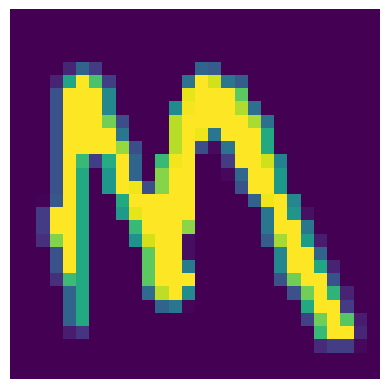

In [44]:
img = cv2.resize(thresh, (28, 28))
plt.imshow(img)
plt.axis('off')  
plt.show()

In [45]:
img.shape

(28, 28)

In [46]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

(28, 28, 1)

In [47]:
img = np.reshape(img, (1,28,28,1))
img.shape

(1, 28, 28, 1)

In [48]:
previsao = rede_neural_carregada.predict(img)

1/1 [==============================] - 0s 304ms/step


In [49]:
previsao

array([[3.7755362e-14, 4.2166571e-14, 4.7680810e-23, 1.5162652e-21,
        1.6763895e-12, 5.0661395e-22, 4.2709618e-18, 2.5868587e-15,
        3.5486291e-21, 8.8254414e-18, 2.5209605e-11, 1.0340529e-16,
        1.0181046e-13, 7.4804586e-11, 5.0485624e-15, 1.4770879e-31,
        1.0698045e-14, 2.9502403e-09, 3.6589526e-31, 1.1238886e-17,
        5.0618763e-12, 3.1021515e-16, 9.9998581e-01, 1.4022285e-05,
        4.4435780e-15, 1.3560401e-18, 4.0138455e-13, 1.2282678e-09,
        4.7652112e-14, 9.7626377e-13, 1.2736447e-09, 1.0458895e-26,
        1.1263257e-07, 6.5749035e-15, 9.9116354e-16, 7.6538298e-24]],
      dtype=float32)

In [50]:
np.argmax(previsao)

22

In [55]:
nomes_labels[22]

'M'

: 